# Projet Accidents : tests de modèles de Machine Learning baseline

## Import

In [1]:
import sys

sys.path.append('..')

import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import shap

from sklearn import neighbors
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    make_scorer,
    recall_score,
)

from global_vars import chargement_train_test_data

## 1. Models V3

#### Récupération des fichiers train et test

In [ ]:
X_train, y_train, X_test, y_test = chargement_train_test_data()

#### KNN V3 data15variables_dropFirst_stratified

In [3]:
# Définir les métriques d'évaluation avec le scoring personnalisé
scorer = make_scorer(recall_score, average='macro', labels=[2])

# Définir la grille de recherche
param_grid = {'n_neighbors': [181, 183, 185]}

# Définir le modèle KNN
knn = neighbors.KNeighborsClassifier()

# Initialiser GridSearchCV avec les hyperparamètres
grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=4)

# Exécuter la recherche sur la grille sur les données d'entraînement
grid_search_knn.fit(X_train, y_train)

# Obtenir les meilleurs paramètres
best_params_knn = grid_search_knn.best_params_
print("Meilleurs paramètres:", best_params_knn)

# Prédire sur les données de test avec le meilleur modèle
y_pred_knn = grid_search_knn.best_estimator_.predict(X_test.values)

# Afficher le rapport de classification sur les données de test
class_report = classification_report(y_test, y_pred_knn)
print("Rapport de classification sur les données de test :\n", class_report)

C:\Users\rtumb\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py:976: UserWarning: One or more of the test scores are non-finite: [nan nan nan]
  warnings.warn(
C:\Users\rtumb\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Meilleurs paramètres: {'n_neighbors': 181}
Rapport de classification sur les données de test :
               precision    recall  f1-score   support

           1       0.59      0.76      0.66      6163
           2       0.53      0.63      0.57      6163
           3       0.41      0.29      0.34      6164
           4       0.48      0.40      0.43      6163

    accuracy                           0.52     24653
   macro avg       0.50      0.52      0.50     24653
weighted avg       0.50      0.52      0.50     24653



In [5]:
# Créer la matrice de confusion croisée
conf_matrix = pd.crosstab(y_test, y_pred_knn, rownames=['Valeurs Réelles'], colnames=['Valeurs Prédites'])

# Afficher la matrice de confusion croisée
print(conf_matrix)

Valeurs Prédites     1     2     3     4
Valeurs Réelles                         
1                 4657   604   332   570
2                  615  3852  1089   607
3                  856  2056  1758  1494
4                 1782   822  1104  2455


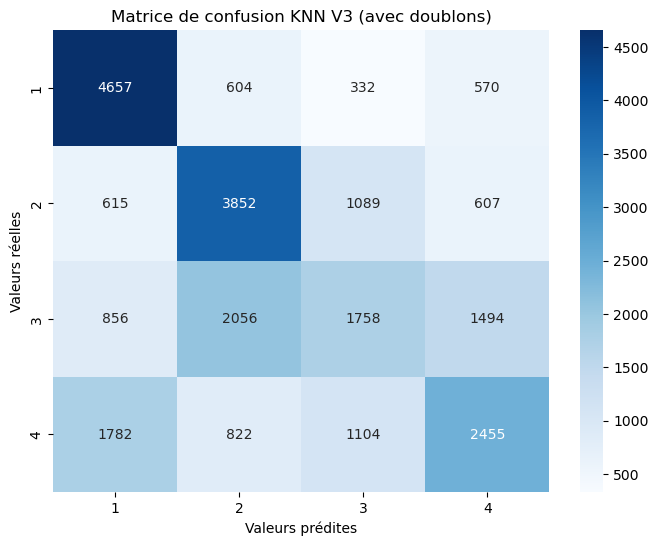

In [6]:
# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_knn)

# Étiquettes personnalisées
labels = [1, 2, 3, 4]

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion KNN V3 (avec doublons)')
plt.show()

#### Régression logistique V3 avec data15variables_dropFirst_stratified.csv

In [7]:
# Définir les métriques d'évaluation avec le scoring personnalisé
scorer = make_scorer(recall_score, average='macro', labels=[2])

# Définition des hyperparamètres à rechercher
param_grid = {
    'penalty': ['l2'],  # Type de régularisation
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Force de régularisation
}

# Création du modèle de régression logistique
lr = LogisticRegression(max_iter=1000)

# Création de l'objet GridSearchCV
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=4)

# Exécuter la recherche sur la grille sur les données d'entraînement
grid_search_lr.fit(X_train, y_train)

# Obtenir les meilleurs paramètres
best_params_lr = grid_search_lr.best_params_
print("Meilleurs paramètres:", best_params_lr)

# Prédire sur les données de test avec le meilleur modèle
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)

# Afficher le rapport de classification sur les données de test
class_report = classification_report(y_test, y_pred_lr)
print("Rapport de classification sur les données de test :\n", class_report)

Meilleurs paramètres: {'C': 0.001, 'penalty': 'l2'}
Rapport de classification sur les données de test :
               precision    recall  f1-score   support

           1       0.58      0.75      0.65      6163
           2       0.51      0.60      0.55      6163
           3       0.41      0.26      0.32      6164
           4       0.47      0.41      0.44      6163

    accuracy                           0.51     24653
   macro avg       0.49      0.51      0.49     24653
weighted avg       0.49      0.51      0.49     24653



In [8]:
# Créer la matrice de confusion croisée
conf_matrix = pd.crosstab(y_test, y_pred_lr, rownames=['Valeurs Réelles'], colnames=['Valeurs Prédites'])

# Afficher la matrice de confusion croisée
print(conf_matrix)

Valeurs Prédites     1     2     3     4
Valeurs Réelles                         
1                 4620   674   272   597
2                  691  3704  1078   690
3                  898  2053  1615  1598
4                 1783   849  1013  2518


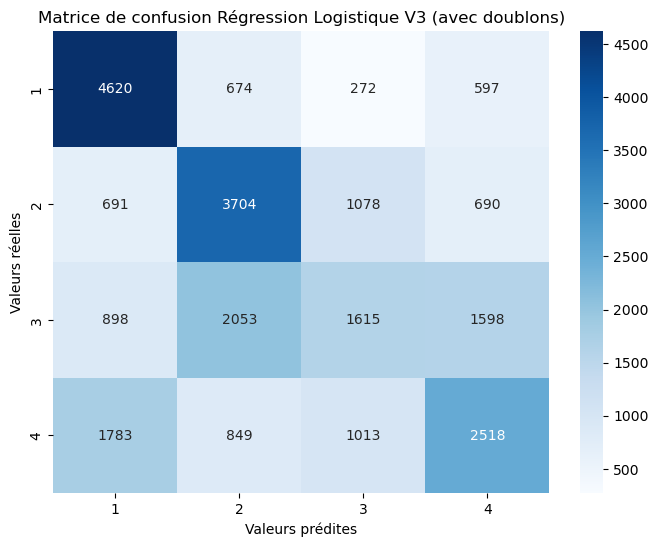

In [9]:
# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_lr)

# Étiquettes personnalisées
labels = [1, 2, 3, 4]

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', xticklabels=labels, yticklabels=labels)
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion Régression Logistique V3 (avec doublons)')
plt.show()

#### SVM V3

In [36]:
# Définir les métriques d'évaluation avec le scoring personnalisé
scorer = make_scorer(recall_score, average='macro', labels=[2])

# Définition des hyperparamètres à rechercher
param_grid = {
    'C': [0.1, 1, 10],  # Paramètre de régularisation
    'gamma': [0.1, 0.01, 0.001],  # Paramètre du noyau RBF
    'kernel': ['linear'],  # Type de noyau
}

# Création du modèle SVM
svm = SVC()

# Création de l'objet GridSearchCV
grid_search_svm = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=4)

# Exécuter la recherche sur la grille sur les données d'entraînement
grid_search_svm.fit(X_train, y_train)

# Obtenir les meilleurs paramètres
best_params_svm = grid_search_svm.best_params_
print("Meilleurs paramètres:", best_params_svm)

# Prédire sur les données de test avec le meilleur modèle
y_pred_svm = grid_search_svm.best_estimator_.predict(X_test)

# Afficher le rapport de classification sur les données de test
class_report = classification_report(y_test, y_pred_svm)
print("Rapport de classification sur les données de test :\n", class_report)

KeyboardInterrupt: 

#### Decision Tree V3 avec data15variables_dropFirst_stratified.csv

In [10]:
# Définir les métriques d'évaluation avec le scoring personnalisé
scorer = make_scorer(recall_score, average='macro', labels=[2])

# Définir les hyperparamètres à tester
param_grid = {
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialiser le modèle d'arbre de décision
dt = DecisionTreeClassifier()

# Création de l'objet GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring=scorer, n_jobs=4)

# Exécuter la recherche sur la grille sur les données d'entraînement
grid_search_dt.fit(X_train, y_train)

# Obtenir les meilleurs paramètres
best_params_dt = grid_search_dt.best_params_
print("Meilleurs paramètres:", best_params_dt)

# Prédire sur les données de test avec le meilleur modèle
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)

# Afficher le rapport de classification sur les données de test
class_report = classification_report(y_test, y_pred_dt)
print("Rapport de classification sur les données de test :\n", class_report)

Meilleurs paramètres: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Rapport de classification sur les données de test :
               precision    recall  f1-score   support

           1       0.59      0.70      0.64      6163
           2       0.42      0.72      0.53      6163
           3       0.40      0.16      0.23      6164
           4       0.47      0.32      0.38      6163

    accuracy                           0.48     24653
   macro avg       0.47      0.48      0.45     24653
weighted avg       0.47      0.48      0.45     24653



In [11]:
# Créer la matrice de confusion croisée
conf_matrix = pd.crosstab(y_test, y_pred_dt, rownames=['Valeurs Réelles'], colnames=['Valeurs Prédites'])

# Afficher la matrice de confusion croisée
print(conf_matrix)

Valeurs Prédites     1     2     3     4
Valeurs Réelles                         
1                 4293  1513    95   262
2                  463  4463   717   520
3                  759  2945  1008  1452
4                 1799  1659   719  1986


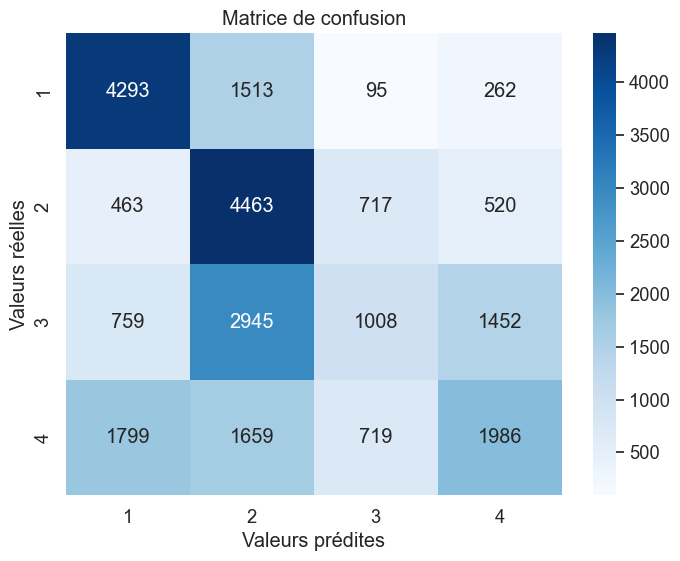

In [5]:
# Créer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Créer un heatmap pour visualiser la matrice de confusion
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Ajuster la taille de la police
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['1','2','3','4'], 
            yticklabels=['1','2','3','4'])
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles')
plt.title('Matrice de confusion Decision Tree V3 (avec doublons)')
plt.show()

C:\Users\rtumb\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:962: UserWarning: The figure layout has changed to tight
  pl.tight_layout()
C:\Users\rtumb\anaconda3\Lib\site-packages\shap\plots\_beeswarm.py:636: UserWarning: The figure layout has changed to tight
  pl.tight_layout(pad=0, w_pad=0, h_pad=0.0)


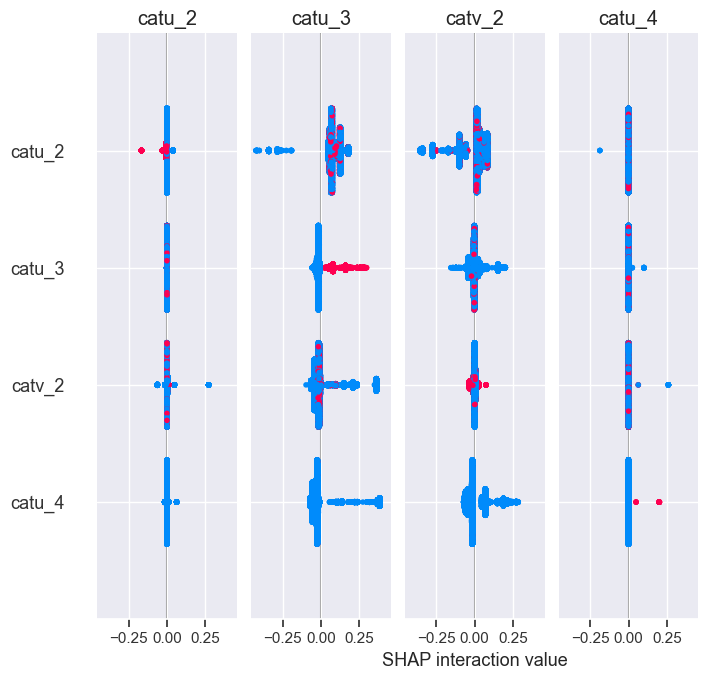

In [7]:
# Initialiser l'Explainer SHAP avec votre modèle et les données d'entraînement
explainer = shap.Explainer(grid_search_dt.best_estimator_, X_train)

# Calculer les valeurs SHAP pour l'ensemble de test
shap_values = explainer.shap_values(X_test)

# Tracer les valeurs SHAP pour une observation spécifique (par exemple, la première observation de l'ensemble de test)
shap.summary_plot(shap_values, X_test)

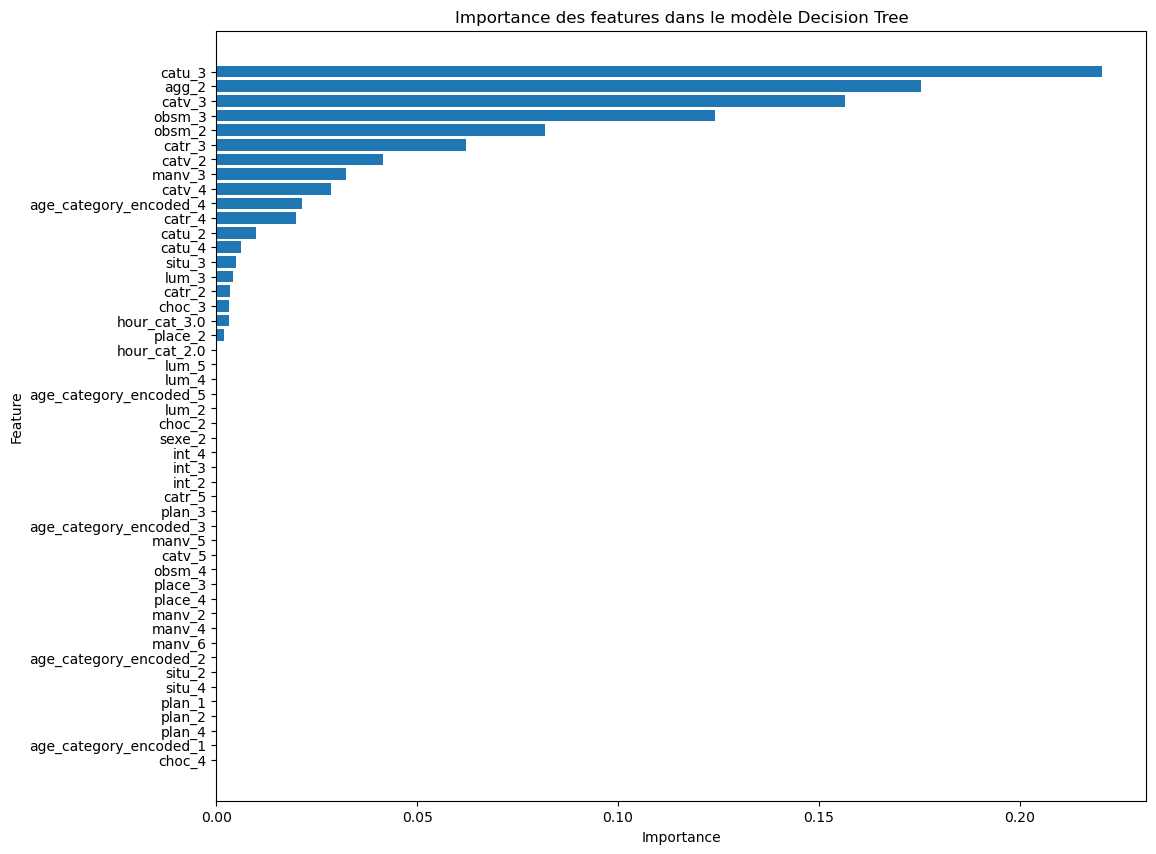

In [12]:
# Obtenir l'importance des features à partir du meilleur modèle
importance = grid_search_dt.best_estimator_.feature_importances_

# Obtenez le nom des features
feature_names = X_train.columns  

# Créer un DataFrame pour une meilleure manipulation
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})

# Trier les features par importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Tracer les features importantes
plt.figure(figsize=(12, 10))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Importance des features dans le modèle Decision Tree')
plt.gca().invert_yaxis()
plt.show()

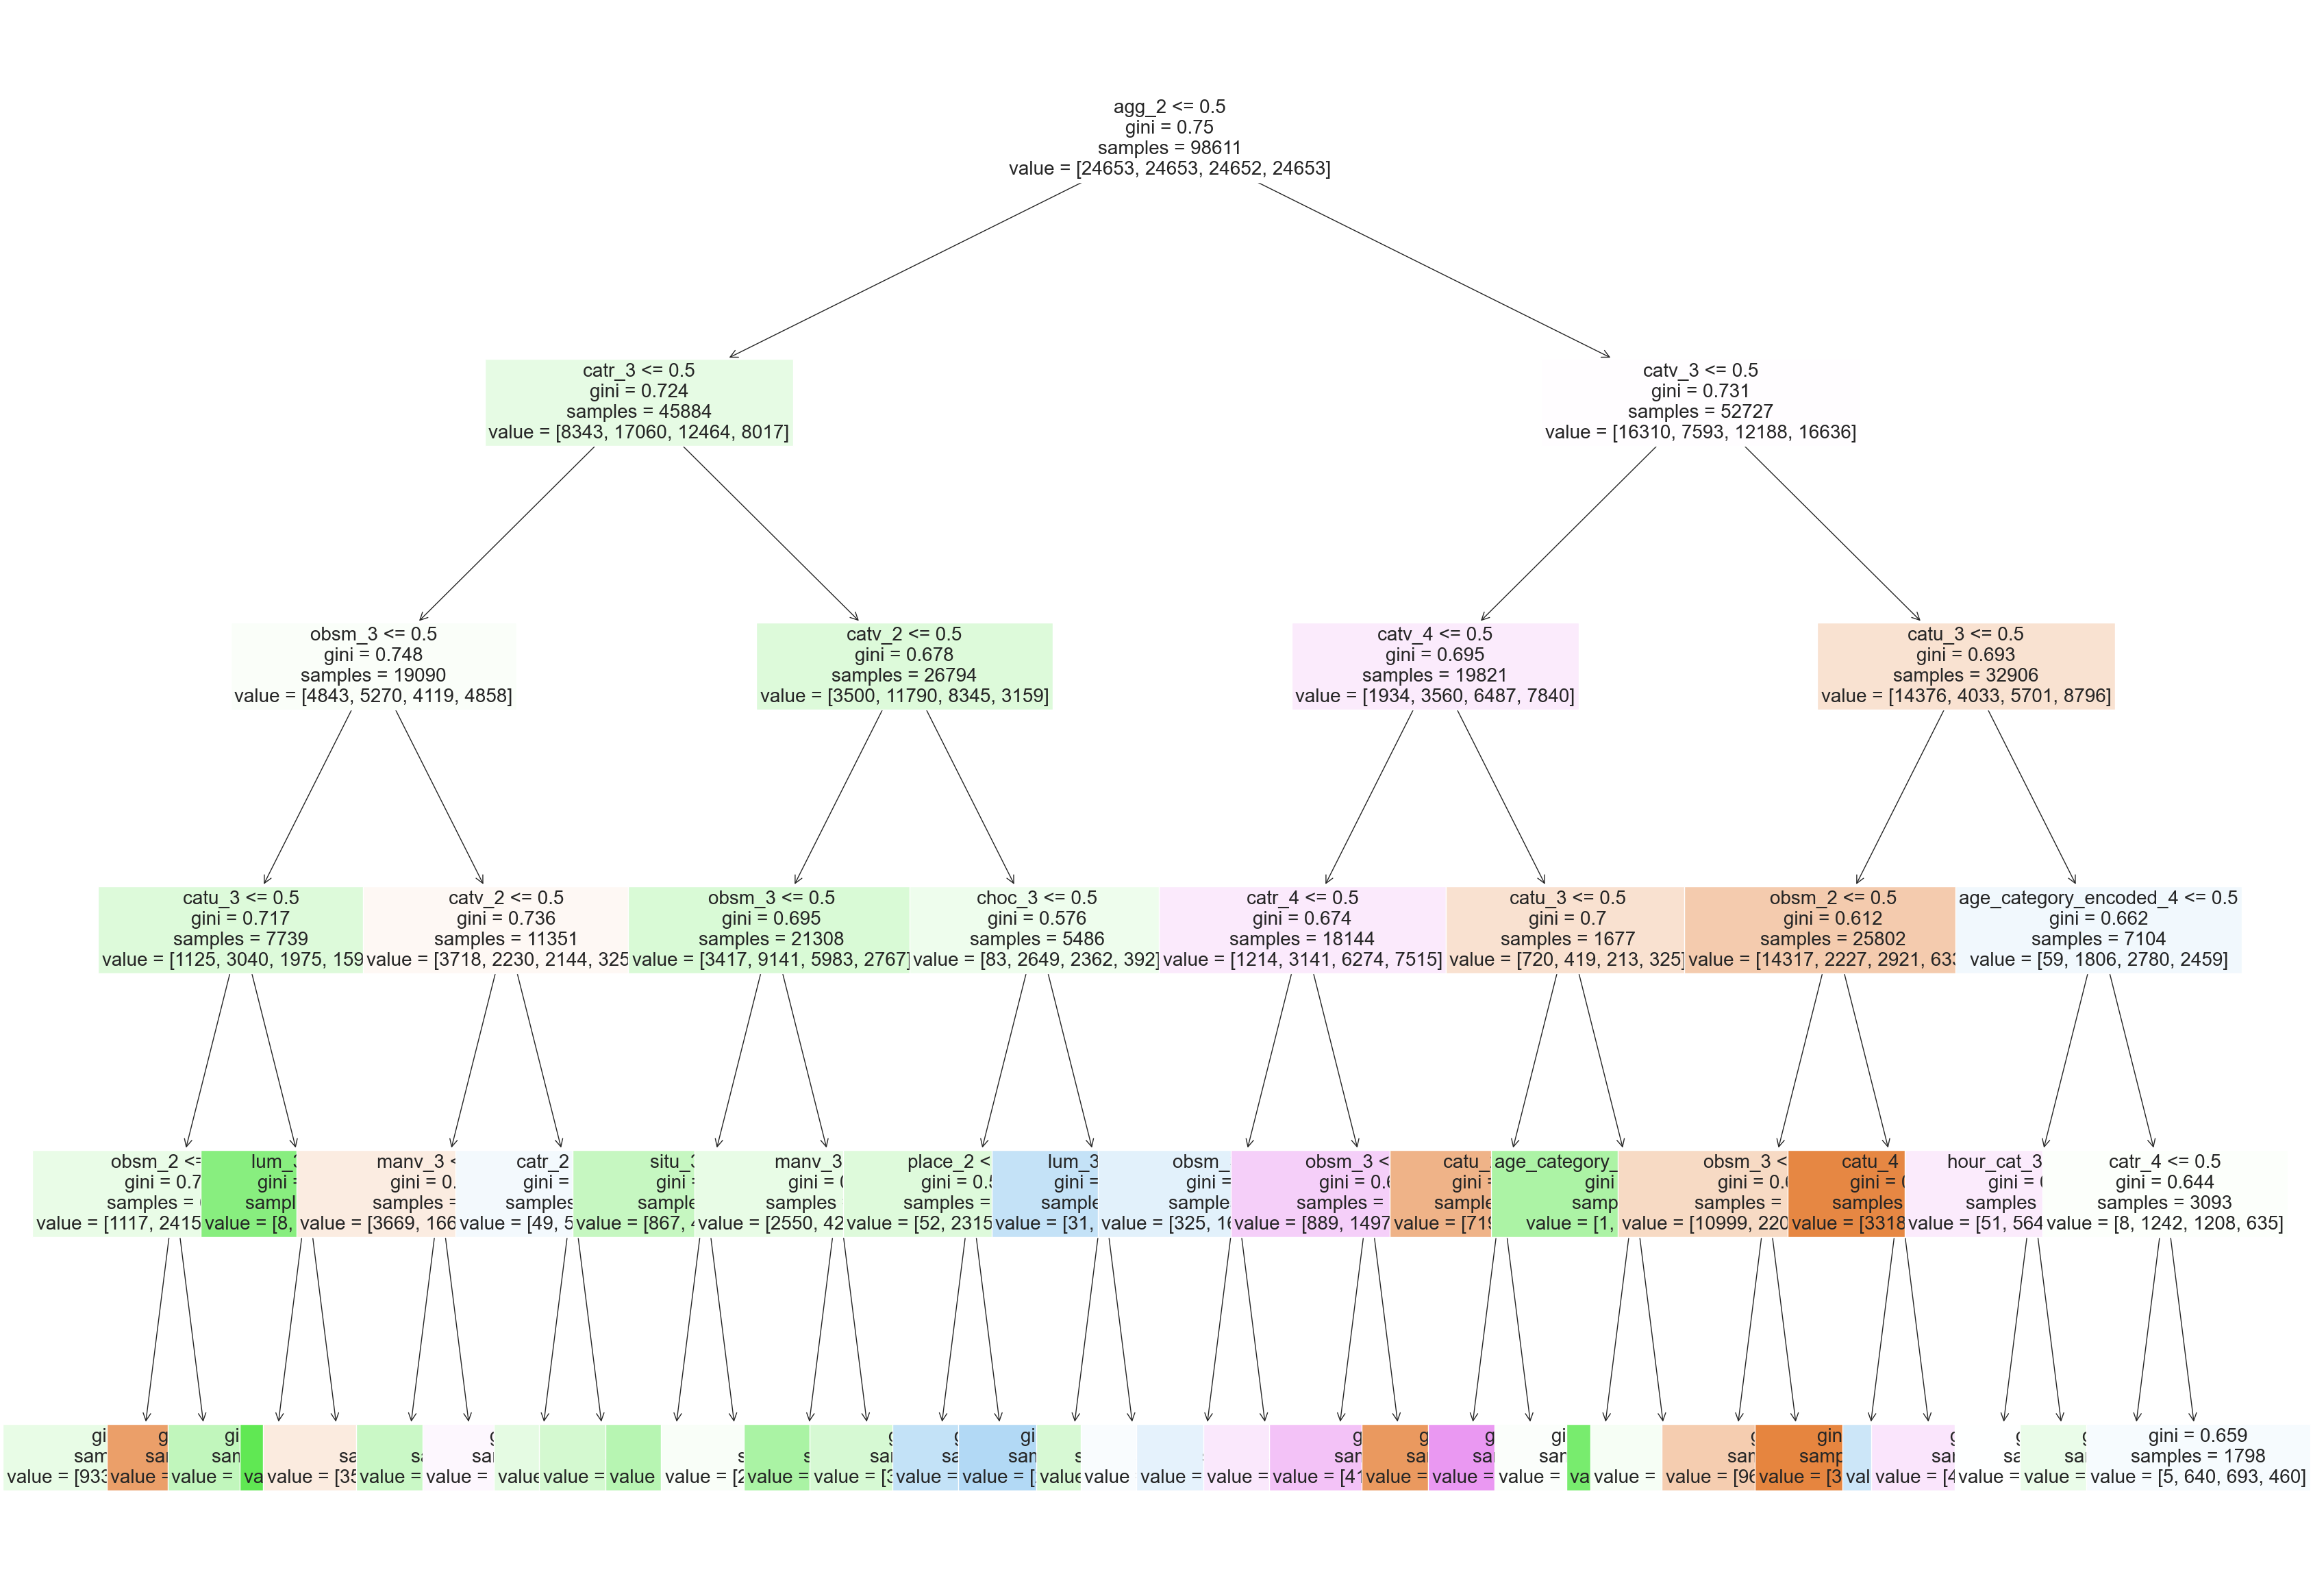

In [23]:
# Tracer l'arbre de décision
plt.figure(figsize=(40,30))
plot_tree(grid_search_dt.best_estimator_, feature_names=X_train.columns.tolist(), filled=True, fontsize=20)
plt.show()